# Neuropixels experiments

author: steeve.laquitaine@epfl.ch  
last modified: 17.07.2024  
status: up-to-date  

### Setup

Activate `spikeinterf..` venv

In [ ]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
LAYER = "L5"
DURATION = 1.01
SF_V = 30000          # sampling frequency
SF_S = 40000
SF_B = 20000
SF_E = 20000
ID_PERIOD_SILI = 51  # 10, 7
ID_PERIOD_VIVO = 7
L5_SITE_SILI = 0
L5_SITE_VIVO = 6

# in vivo (marques)
data_conf_vivo, param_conf_h_vivo = get_config("vivo_marques", "c26").values() 
PREP_PATH_vivo = data_conf_vivo["preprocessing"]["output"]["trace_file_path"]

# biophy model
cfg_ns, param_conf_sili = get_config("silico_neuropixels", "npx_spont").values()
# PREP_PATH_ns = cfg_ns["preprocessing"]["output"]["full"]["trace_file_path_gain_fitd_adj10perc_less_noise_fitd_int16"]
PREP_PATH_ns = cfg_ns["preprocessing"]["output"]["full"]["trace_file_path"]

# synthetic (Buccino) 
data_conf_b, _ = get_config("buccino_2020", "2020").values()
PREP_PATH_b = data_conf_b["preprocessing"]["output"]["trace_file_path_gain_ftd"]

# evoked biophy model
data_conf_e, param_conf_e = get_config("silico_neuropixels", "npx_evoked").values()
# PREP_PATH_e = data_conf_e["preprocessing"]["output"]["full"]["trace_file_path_gain_fitd_adj10perc_less_noise_fitd_int16"]
PREP_PATH_e = data_conf_e["preprocessing"]["output"]["full"]["trace_file_path"]

# FIGURE SETTINGS
FIG_SIZE = (0.9, 0.7)
# colors
COLOR_MV = [0.6, 0.6, 0.6]
COLOR_MS = [0.9, 0.14, 0.15]
COLOR_B = [0.22, 0.5, 0.72]
COLOR_E = [1, 0.49, 0]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-07-17 18:43:33,864 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-17 18:43:33,883 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-07-17 18:43:33,883 - root - utils.py - get_config - INFO - Reading experiment config.


2024-07-17 18:43:33,952 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-07-17 18:43:33,953 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-17 18:43:33,972 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-07-17 18:43:33,973 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-17 18:43:34,000 - root - utils.py - get_config - INFO - Reading experiment config. - done


### (.2s)Load dataset

In [96]:
# biophy model
RecS = si.load_extractor(PREP_PATH_ns)
RecS = RecS.frame_slice(start_frame=0, end_frame=10 * 60 * SF_S)
traces_s = RecS.get_traces()

# synthetic model
RecB = si.load_extractor(PREP_PATH_b)
traces_b = RecB.get_traces()

# evoked biophy model
RecE = si.load_extractor(PREP_PATH_e)
traces_e = RecE.get_traces()

### Parametrize


In [97]:
YLIM = (-100, 30)

ID_PERIOD_B = 46  # period near argmax amplitude
ID_PERIOD_E = 6
SITE_B = 352  # 40  # site of argmax amplitude
SITE_E = 232

### Marques-Smith

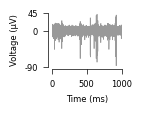

In [163]:
# get traces
Recording_vivo = si.load_extractor(PREP_PATH_vivo)
traces_vivo = Recording_vivo.get_traces()

# get a site in layer 5
layers_vivo = Recording_vivo.get_property("layers")
L5_site_vivo = np.where(layers_vivo == LAYER)[0][L5_SITE_VIVO]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange((ID_PERIOD_VIVO - 1) * SF_V, ID_PERIOD_VIVO * SF_V, 1)
ax.plot(traces_vivo[one_sec_period, L5_site_vivo], color=COLOR_MV)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
ax.set_yticks([-90, 0, 45], [-90, 0, 45])
ax.set_ylim([-90, 45])
ax.set_xticks([0, SF_V / 2, SF_V], [0, 500, 1000])
ax.set_xlim([0, SF_V])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# save
plt.savefig("figures/0_validation/1_components/fig2a_compo_vivo_npx.svg")

In [159]:
max(traces_vivo[one_sec_period, L5_site_vivo])

41

### Spont. Biophysical model

* plot trace from site 143 in layer 5
* we will plot the same trace from site 143 in layer 5, same as for the evoked model, but locked to the stimulus.

Sites in layer 5: 143


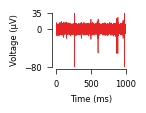

In [130]:
# get a site in layer 5
SITE_IX = 21
layers_s = RecS.get_property("layers")
L5_site = np.where(layers_s == LAYER)[0][SITE_IX]
print("Sites in layer 5:", L5_site)

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange((ID_PERIOD_SILI - 1) * SF_S, ID_PERIOD_SILI * SF_S, 1)
ax.plot(traces_s[one_sec_period, L5_site], color=COLOR_MS)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
plt.xticks([0, SF_S / 2, SF_S])
ax.set_xticklabels([0, 500, 1000])
ax.set_xlim([0, SF_S])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.set_yticks([-80, 0, 35])
ax.set_ylim([-80, 35])

# save
plt.savefig("figures/0_validation/1_components/fig2b_compo_silico_npx.svg")

### Synthetic model (Buccino)

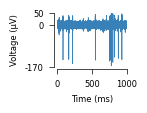

In [164]:
# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange((ID_PERIOD_B - 1) * SF_B, ID_PERIOD_B * SF_B, 1)
ax.plot(traces_b[one_sec_period, SITE_B], color=COLOR_B)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
ax.set_yticks([-170, 0, 50], [-170, 0, 50])
ax.set_ylim([-170, 50])
ax.set_xticks([0, SF_B / 2, SF_B], [0, 500, 1000])
ax.set_xlim([0, SF_B])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# save
plt.savefig("figures/0_validation/1_components/fig2d_compo_synth_npx.svg")

### Evoked biophysical model 

* from stimulus start (STIM_START= 20110000 at the 5000th stimulus epoch, t=0 ms) to 1000 ms after.
* plot trace from site 143 in layer 5, same as for the spontaneous model.

Sites in layer 5: 143
Identified stimulus sample index: 20110000


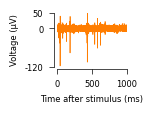

In [154]:
# set sample start at stimulus start (5000th epoch)
STIM_START = 20110000
SITE_IX = 21
layers_e = RecE.get_property("layers")
L5_site = np.where(layers_e == LAYER)[0][SITE_IX]
print("Sites in layer 5:", L5_site)
print("Identified stimulus sample index:", STIM_START)

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one second period
one_sec_period = np.arange(STIM_START, STIM_START + SF_E, 1)
ax.plot(traces_e[one_sec_period, L5_site], color=COLOR_E)  # 21, 25, 40, 38

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time after stimulus (ms)")
ax.set_yticks([-120, 0, 50], [-120, 0, 50])
ax.set_ylim([-120, 50])
ax.set_xticks([0, SF_E / 2, SF_E], [0, 500, 1000])
ax.set_xlim([0, SF_E])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# save
plt.savefig("figures/0_validation/1_components/fig2e_compo_evoked_npx.svg")